In [1]:
# plots an example of an earthlike planet spectrum

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.constants as const

In [2]:
file_name = '/Users/eckhartspalding/Documents/git.repos/life_detectors/data/example_exoplanet_spectrum_Proof_of_Concept_R100_SN20.txt'

# 'The first column is wavelength (in um), second is flux (in erg/s/Hz/m2), and the third is the error on the flux.' --Z.B.
df = pd.read_csv(file_name, delim_whitespace=True, names=['wavelength', 'flux', 'err_flux'])

wavel = df['wavelength'].values * u.mu
flux_nu = df['flux'].values * u.erg / (u.second * u.Hz * u.m**2)
err_flux_nu = df['err_flux'].values * u.erg / (u.second * u.Hz * u.m**2)

/var/folders/wb/zn41c4yx58z1ktmcwgv62zyr0000gn/T/ipykernel_79008/2198185344.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, names=['wavelength', 'flux', 'err_flux'])


In [3]:
flux_nu

<Quantity [1.26329048e-28, 1.28262371e-28, 1.30598738e-28, 1.14475255e-28,
           2.81655901e-29, 4.76161208e-29, 5.13233675e-29, 3.72686783e-29,
           3.36697962e-29, 4.28785705e-29, 1.57375390e-28, 3.27713896e-28,
           4.00428901e-28, 4.48402600e-28, 4.79964228e-28, 4.75894028e-28,
           5.10375328e-28, 4.97791554e-28, 4.97817818e-28, 6.00650120e-28,
           6.50209133e-28, 7.18900000e-28, 6.99819035e-28, 7.44235678e-28,
           6.89551397e-28, 7.23005385e-28, 7.44213836e-28, 7.71901529e-28,
           7.86826385e-28, 8.16331745e-28, 7.51788039e-28, 9.36009174e-28,
           7.58648208e-28, 7.99977101e-28, 8.85029874e-28, 7.46319982e-28,
           9.13752564e-28, 8.40283641e-28, 8.38673088e-28, 9.42002791e-28,
           1.05654110e-27, 1.06407135e-27, 1.30751042e-27, 1.54889531e-27,
           1.96220019e-27, 1.68395488e-27, 1.40526694e-27, 1.56203168e-27,
           1.71615529e-27, 1.74228734e-27, 1.94465960e-27, 2.51870333e-27,
           2.42953089e-27

In [66]:
flux_lambda = flux_nu * (const.c / wavel**2)
flux_lambda = flux_lambda * (u.m / (1e6 * u.um)).to(u.W / (u.m**2 * u.um))

UnitConversionError: 'm / um' (dimensionless) and 'W / (um m2)' (power density/spectral flux density wav) are not convertible

In [65]:
flux_lambda

<Quantity [2.32059667e-27, 2.30940917e-27, 2.30486655e-27, 1.98026635e-27,
           4.77568887e-28, 7.91364137e-28, 8.36070075e-28, 5.95081856e-28,
           5.26960895e-28, 6.57784114e-28, 2.36638325e-27, 4.83001305e-27,
           5.78474267e-27, 6.34938898e-27, 6.66158945e-27, 6.47417495e-27,
           6.80564091e-27, 6.50626974e-27, 6.37764234e-27, 7.54252005e-27,
           8.00300619e-27, 8.67308802e-27, 8.27553735e-27, 8.62633105e-27,
           7.83407022e-27, 8.05132821e-27, 8.12323321e-27, 8.25844470e-27,
           8.25126359e-27, 8.39099406e-27, 7.57438407e-27, 9.24351602e-27,
           7.34349344e-27, 7.59005658e-27, 8.23058245e-27, 6.80303792e-27,
           8.16416198e-27, 7.35892024e-27, 7.19923046e-27, 7.92593928e-27,
           8.71344975e-27, 8.60160840e-27, 1.03599881e-26, 1.20293274e-26,
           1.49371512e-26, 1.25649306e-26, 1.02776460e-26, 1.11977263e-26,
           1.20587356e-26, 1.19996936e-26, 1.31280176e-26, 1.66662447e-26,
           1.57575374e-26

In [ ]:
flux_lambda.to(u.J / (u.second * u.m * u.mu**2))

UnitConversionError: 'erg / (m s mu2)' and 'J / (mu s m2)' are not convertible

In [42]:
flux_lambda.to(u.W / (u.m**2 * u.um))

UnitConversionError: 'erg / (m s mu2)' and 'W / (um m2)' (power density/spectral flux density wav) are not convertible

In [33]:
flux_photons = flux_lambda * (wavel / (const.h * const.c)) * u.ph
flux_photons = flux_photons.to(u.ph / (u.um * u.s * u.m**2))

UnitConversionError: 'erg ph / (J mu s m2)' and 'ph / (s um m2)' (photon flux density wav) are not convertible

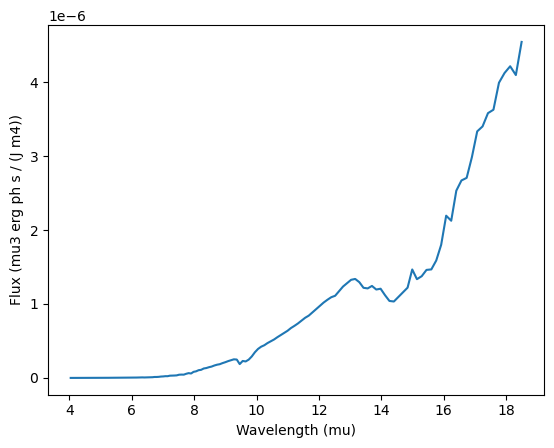

In [28]:
plt.plot(wavel, flux_photons)
plt.xlabel('Wavelength (' + str(wavel.unit) + ')')
plt.ylabel('Flux (' + str(flux_photons.unit) + ')')
plt.show()